<a href="https://colab.research.google.com/github/ClaudixoPG/ESI_2025_S1/blob/main/notebooks/anova_experience_satisfaccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis ANOVA: Niveles de Experiencia y Satisfacción
Este notebook analiza si existen diferencias significativas en la satisfacción entre usuarios con diferentes niveles de experiencia.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Configuración visual
sns.set(style="whitegrid")


In [2]:
# Cargar datos desde GitHub
url = "https://raw.githubusercontent.com/ClaudixoPG/ESI_2025_S1/main/datasets/dataset_anova_experience_satisfaccion.xlsx"
df = pd.read_excel(url)
df.head()


,user_id,experience_level,satisfaction_score
0,user_1,Experto,82.1
1,user_2,Principiante,59.4
2,user_3,Experto,81.9
3,user_4,Experto,77.7
4,user_5,Principiante,65.9


In [3]:
# Verificar medias por grupo
group_means = df.groupby("experience_level")["satisfaction_score"].mean()
print("Media por nivel de experiencia:")
print(group_means)


Media por nivel de experiencia:
experience_level
Experto         80.686207
Intermedio      75.436111
Principiante    68.212000
Name: satisfaction_score, dtype: float64


In [4]:
# Separar grupos
principiante = df[df["experience_level"] == "Principiante"]["satisfaction_score"]
intermedio = df[df["experience_level"] == "Intermedio"]["satisfaction_score"]
experto = df[df["experience_level"] == "Experto"]["satisfaction_score"]

# Realizar ANOVA
f_stat, p_value = f_oneway(principiante, intermedio, experto)

print(f"Estadístico F: {f_stat:.2f}")
print(f"Valor p: {p_value:.4f}")


Estadístico F: 32.62
Valor p: 0.0000


<ipython-input-5-f928956af5aa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="experience_level", y="satisfaction_score", data=df, palette="Set2")


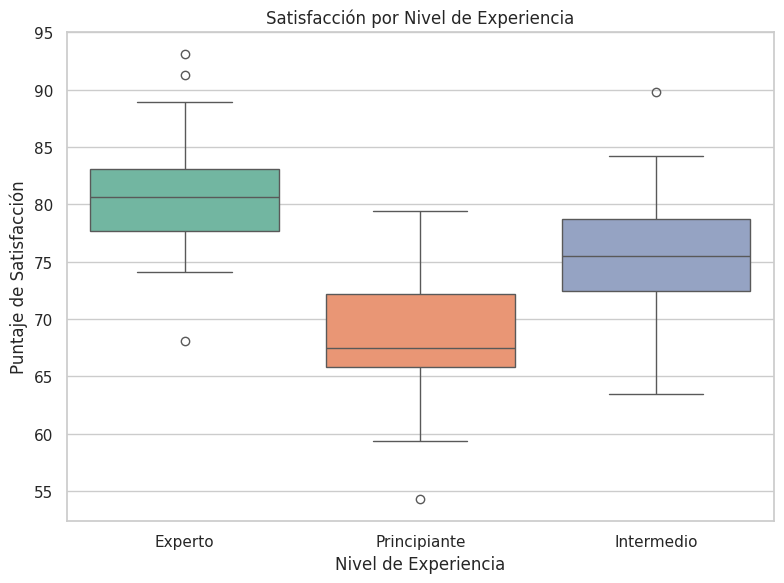

In [5]:
# Boxplot comparativo
plt.figure(figsize=(8, 6))
sns.boxplot(x="experience_level", y="satisfaction_score", data=df, palette="Set2")
plt.title("Satisfacción por Nivel de Experiencia")
plt.xlabel("Nivel de Experiencia")
plt.ylabel("Puntaje de Satisfacción")
plt.tight_layout()
plt.show()


**Interpretación:**
- El análisis ANOVA permite comparar más de dos grupos.
- Si el valor *p* es menor a 0.05, existe una diferencia significativa entre al menos dos niveles de experiencia.